#1. Defining the Question

###1.1 Context
Women's clothing E-Commerce is one of the most booming sectors of e-commerce. The reviews left by clients on a particular item of clothing plays an huge role in whether the cloth will be bought or not because when it comes to e-commerce the reviews play a big role in sales.

This dataset is from Kaggle and it contains 10 feature variables and 23,486 entries.



### 1.2 Specifying the Question

To conduct a sentiment analysis on the buyer reviews to determine the positive and negative reviews.

###1.3 Objectives

To build a LSTM neural network to classify reviews as positive or negative to help in making business decisions for the enterprise.

### 1.4 Metric for Success

The metric of success for this project would be to use LSTM model with an accuracy of above 90% accuracy.

###1.5 Experimental design


* Defining the Question
* Data Understanding
* Exploratory data analysis
* Text Processing
* Data Modeling

#2. Reading Data

##2.1 Importing Libraries

In [0]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##2.2 Loading dataset

In [0]:
#Loading the first 5 rows of the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


##2.3 Glossary

**Columns**

id

**Clothing ID:** Unique ID of the product

**Age:** Age of the reviewer

**Title:** Title of the review

**Review:** Textreview

**Rating:** Product rating by reviewer

**Recommended IND:** Whether the product is recommended or not by the reviewer

**Positive Feedback Count:** Number of positive feedback on the review

**Division Name:** Name of the division product is in

**Department Name:** Name of the department product is in

**Class Name:** Type of product

#3. Checking the Data

In [0]:
#Checking number of rows and columns
df.shape

(23486, 11)

There are 23,486 rows and 11 columns

In [0]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


There are 6 numerical columns and 5 categorical columns

In [0]:
#checking duplicate values
df.duplicated().sum()

0

There are no duplicate values

In [0]:
#checking for null values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [0]:
#dropping the null values
df=df.dropna()

In [0]:
#confirming null values are dropped
df.shape

(19662, 11)

#3. Exploratory Data Analysis

##3.1 Univariate analysis

###3.1.1 Piechart of ratings count

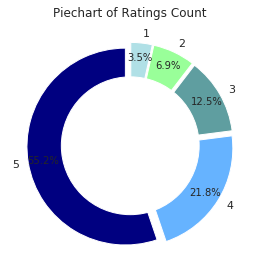

In [0]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['5', '4','3','2','1']
sizes = df['Rating'].value_counts()
#colors
colors = ['navy','#66b3ff','#5F9EA0','#99ff99','#B0E0E6']
#explsion
explode = (0.05,0.05,0.05,0.05, 0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Ratings Count') 
plt.tight_layout()
plt.show()

The chart above shows the frequency of the ratings. Most people give the enterprise a rating of 5, followed by a 4. From the chart we can conclude that most customers are satisfied with the products and service

###3.1.2 Barchart of Age frequency

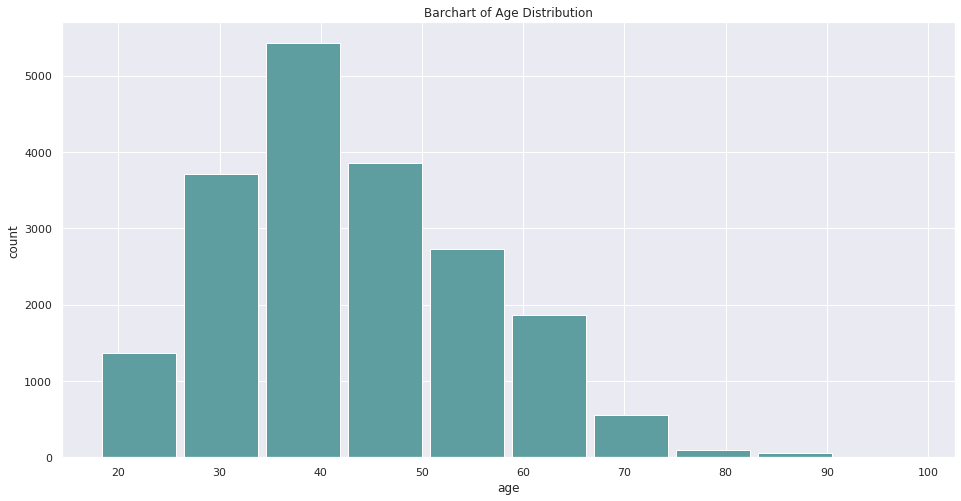

In [0]:
import matplotlib.pyplot as plt
# Pie chart
# labels = df['Age'].value_counts().values
sizes = df['Age']
bins  = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]



 

plt.hist(sizes,  histtype='bar', rwidth=0.9, color='#5F9EA0')

plt.xlabel('age')
plt.ylabel('count')
plt.title('Barchart of Age Distribution') 
plt.show()

From the bargraph above, the age bracket that shops most is (30-50)

###3.1.3 Word Cloud of all Reviews

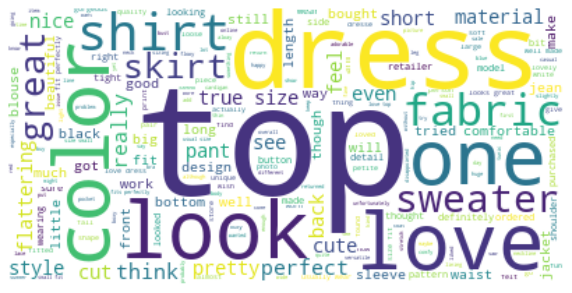

In [0]:
#Renaming data
reviews = df
# Let's build a word cloud looking at the 'Review Text' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews['Review Text'].str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud above is made from all the reviews from the data set. Words mostly mentioned are the clothes items, fashion related words and positive comments

###3.1.4 Word Cloud of Positive and Negative Reviews

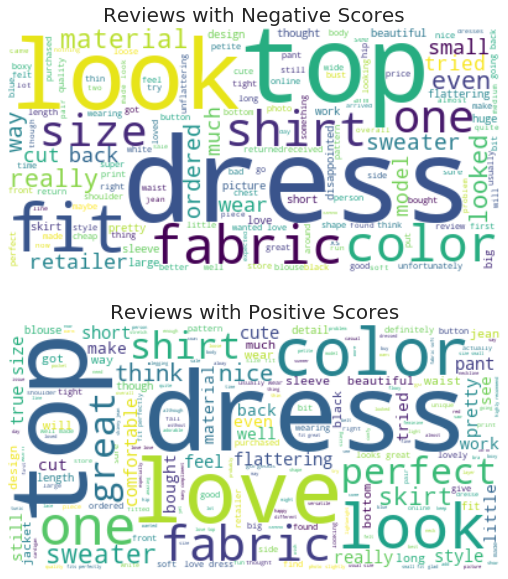

In [0]:
#Renaming dataset
reviews=df
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews[reviews['Rating'].
isin([1,2]) ]
positive_reviews = reviews[reviews['Rating'].
isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews['Review Text'].str.cat()
positive_reviews_str = positive_reviews['Review Text'].str.cat()
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

The first wordcloud is for the negative reviews. Words mostly mentioned are the clothes items, fashion related words and words which imply negativity.

The second wordcloud is for the positive reviews. Words mostly mentioned are the clothes items, fashion related words and words which imply customers liked the clothing

##3.2 Bivariate analysis

###3.2.1 A bargraph of Number of reviews versus Department

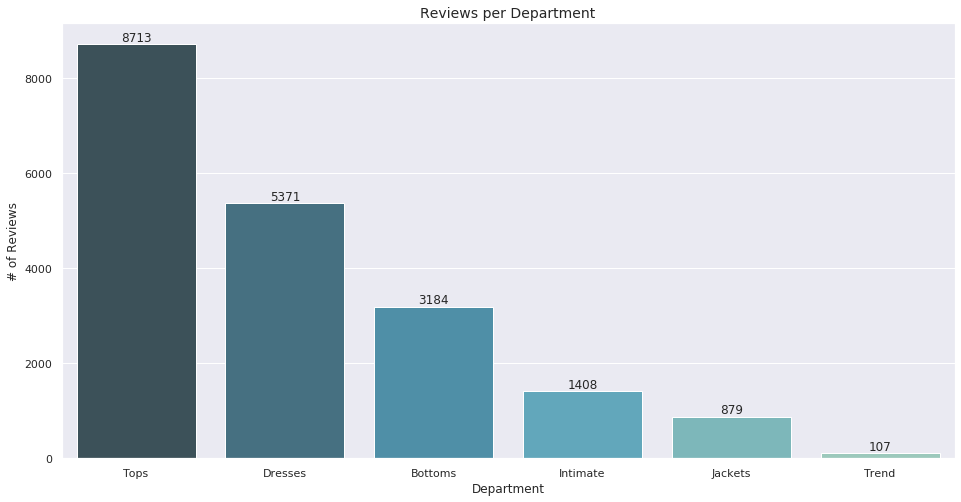

In [0]:
# department name vs reviews
ax=sns.countplot(x='Department Name', data=df,palette="GnBu_d", order = df['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)
x=df['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

From the bar grapgh, we get to see that Tops department had the highest number of reviews at 8713 reviews. Dresses and Bottoms departments follow in frequency of reviews at 5371 and 3184 reviews. Trend department has the lowest number of reviews with 107 reviews.

###3.2.2 A bargraph of Number of reviews versus Class

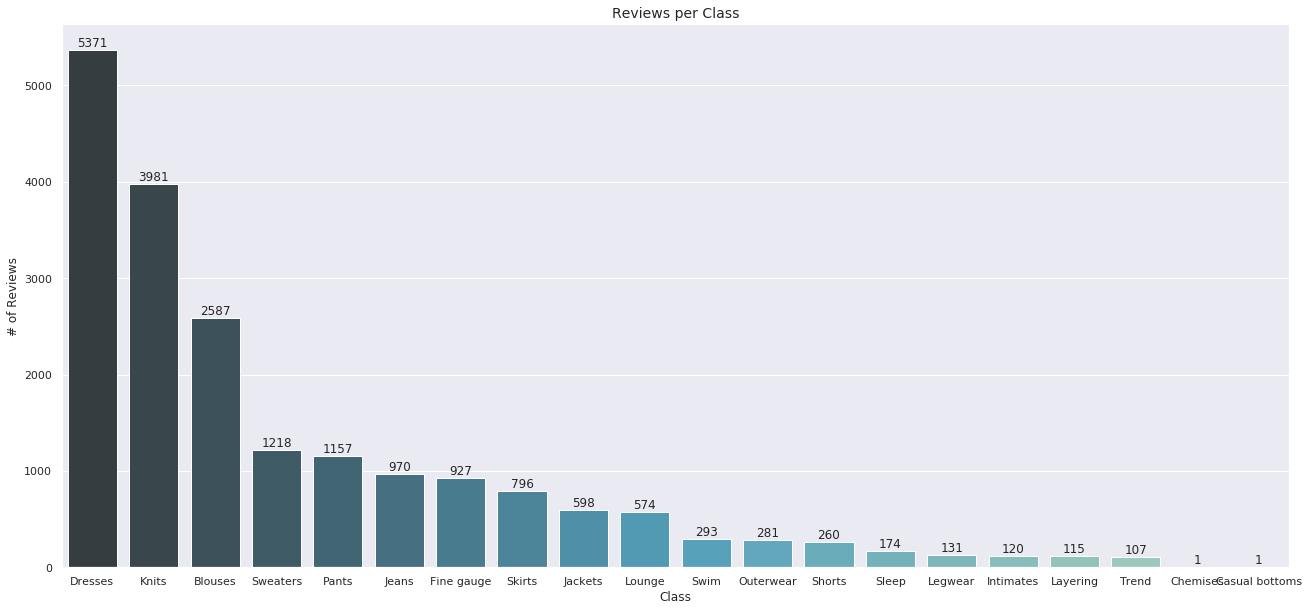

In [0]:
plt.figure(figsize= (22,10  ))
ax=sns.countplot(x='Class Name', data=df,palette="GnBu_d", order = df['Class Name'].value_counts().index)
ax.set_title("Reviews per Class", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Class", fontsize=12)
x=df['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In the class vs number of reviews chart, we see that Dresses top in number of reviews at 5371. Knits and Blouses follow clossely at 3981 and 2587 reviews. Chemises and Casual bottoms have the least number of reviews both having one review each.

###3.2.3 Barchart of ratings against Department

[Text(0, 0.5, 'rating count'),
 Text(0.5, 0, ' Department name'),
 Text(0.5, 1.0, 'Ratings per department')]

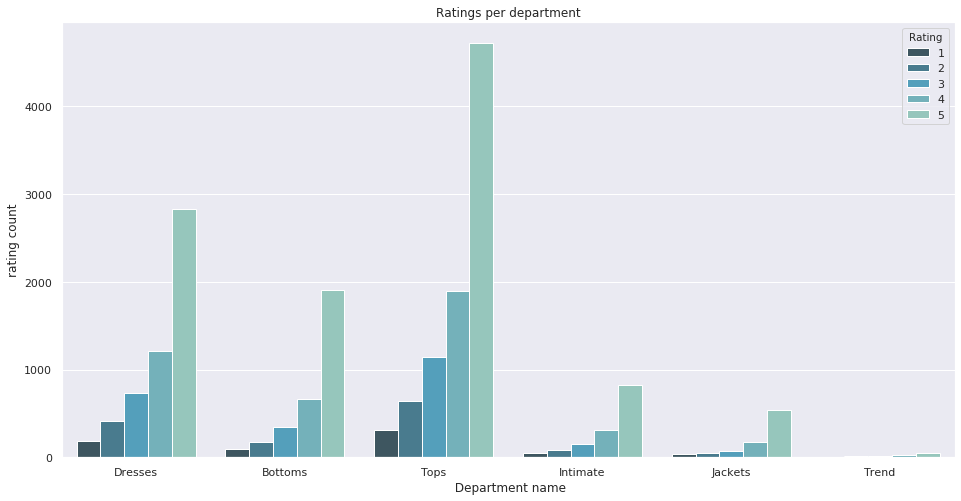

In [0]:
# investigating the relationship between department name and ratings
ratings= sns.countplot('Department Name',palette="GnBu_d", hue = 'Rating', data = df)
ratings.set(title = "Ratings per department",
            ylabel =  'rating count',
        xlabel = " Department name")

From the bar graph above,all departments had high ratings which means the business was doing well and customer satisfaction was high.

#4. Text Processing

### 4.1 labeling Positive and negative sentiments

In [0]:
#labeling Positive and negative sentiments
# 1,2 = negative
# 3 = neutral
# 4,5 = positive

df1 = df[['Review Text','Rating']]

df1['Rating'] = df1['Rating'].replace(1,'negative')
df1['Rating'] = df1['Rating'].replace(2,'negative')
df1['Rating'] = df1['Rating'].replace(3,'neutral')
df1['Rating'] = df1['Rating'].replace(4,'positive')
df1['Rating'] = df1['Rating'].replace(5,'positive')

df1.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Review Text,Rating
2,I had such high hopes for this dress and reall...,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
5,"I love tracy reese dresses, but this one is no...",negative
6,I aded this in my basket at hte last mintue to...,positive
7,"I ordered this in carbon for store pick up, an...",positive
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive
10,Dress runs small esp where the zipper area run...,neutral
12,More and more i find myself reliant on the rev...,positive


###4.2 Dropping neutral sentiments

In [0]:
df1=df1[df1['Rating'] !='neutral']
df1.head(20)

,Review Text,Rating
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
5,"I love tracy reese dresses, but this one is no...",negative
6,I aded this in my basket at hte last mintue to...,positive
7,"I ordered this in carbon for store pick up, an...",positive
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive
12,More and more i find myself reliant on the rev...,positive
13,Bought the black xs to go under the larkspur m...,positive
15,I took these out of the package and wanted the...,positive


###4.3 Piechart of positive and negative sentiments

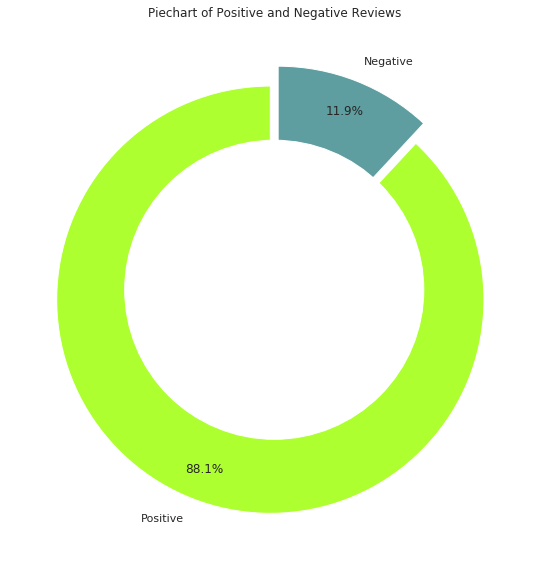

In [0]:
# Let’s see how the overall sentiment is using the sentiment we generated.


import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive','Negative' ]
sizes = df1['Rating'].value_counts()
#colors
colors = ['#ADFF2F','#5F9EA0']
#explsion
explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Positive and Negative Reviews') 
plt.tight_layout()
plt.show()

We have imbalanced data poitive reviews 88.1% and negative reviews are 11.9%

In [0]:
# Import necessary libraries
#We start by loading the libraries necessary for this script:
import requests
import matplotlib.pyplot as plt
import tensorflow as tf

# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re # relgular expressions
import string

###4.4 Text Normalization

In [0]:
#Importing nltk for text processing
import nltk
nltk.download("popular")

df1['Review Text'] = df1['Review Text'].astype('str') #changing the data type from object to string.

letters_only = re.sub("[^a-zA-z0-9\s]"," ", str(df1['Review Text']))  #Search for all non-letters  Replace all non-letters with spaces

# Lower casing and removing punctuations
df1['Review Text'] = df1['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['Review Text'] = df1['Review Text'].str.replace('[^\w\s\_]','') # 'w' will match a character or digit equivalent to [^a-zA-z0-9\s]
                                                                    # 's' matches a single whitespace character 
# Lemmatization
#Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word
#so they can be analysed as a single item e.g word.lemmatize('ate')>>'eat' base form
df1['Review Text'] = df1['Review Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Removal of stop words
import nltk
from nltk.corpus import stopwords #stop words are words which are filtered out before processing of natural language data.
                                   # Stop words are generally the most common words in a language'''
set(stopwords.words('english'))
    
stop = stopwords.words('english')
df1['Review Text'] = df1['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df1['Review Text'].head(5)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one petite 5 foot tall ...
6    aded basket hte last mintue see would look lik...
7    ordered carbon store pick ton stuff always try...
Name: Review Text, dtype: object

In [0]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df1

In [0]:
# Here I'm concatenating all Review Text into a single string.
reviews_str = reviews['Review Text'].str.cat()

In [0]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4,5) Reviews.
negative_reviews = reviews[reviews['Rating']!='positive']
positive_reviews = reviews[reviews['Rating']=='positive']
# Transform to single string
negative_reviews_str = negative_reviews['Review Text'].str.cat()
positive_reviews_str = positive_reviews['Review Text'].str.cat()

#5. Data Modeling

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

###5.1 Tokenizing

In [0]:
# Next, we am dropping the 'Neutral' sentiments as our goal was to only differentiate positive and negative tweets.
# After that, we filtered the review texts so only valid texts and words remain.
# Then, we defined the number of max features as 2000 and used the
# Tokenizer to vectorize and convert text into Sequences so the Network can deal with it as input."""

#If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
max_features = 2000 

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(reviews['Review Text'].values)
X = tokenizer.texts_to_sequences(reviews['Review Text'].values)
X = pad_sequences(X)

###5.2 Embedding

In [0]:

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
#
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 128)           256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 60, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
Y = pd.get_dummies(reviews['Rating']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(12898, 60) (12898, 2)
(4300, 60) (4300, 2)


In [0]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
 - 68s - loss: 0.0717 - acc: 0.9728
Epoch 2/7
 - 68s - loss: 0.0578 - acc: 0.9794
Epoch 3/7
 - 69s - loss: 0.0522 - acc: 0.9822
Epoch 4/7
 - 69s - loss: 0.0487 - acc: 0.9836
Epoch 5/7
 - 68s - loss: 0.0415 - acc: 0.9841
Epoch 6/7
 - 68s - loss: 0.0418 - acc: 0.9850
Epoch 7/7
 - 69s - loss: 0.0331 - acc: 0.9891


In [0]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.23
acc: 0.93


In [0]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 96.875 %
neg_acc 62.76595744680851 %


# 5. Conclusion

We had an accuracy of 93% where:

   * Accuracy of positive review predictions is 96.875%
   * Accuracy of negative review predictions is 62.76%

These scores could be because 88% of the revirews are positive and 11% are negative.

